In [1]:
install.packages("tidyverse")
install.packages("lubridate")
install.packages("ggplot2")

package 'tidyverse' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\mdabr\AppData\Local\Temp\RtmpAhrO6S\downloaded_packages

  There is a binary version available but the source version is later:
          binary source needs_compilation
lubridate 1.7.10  1.8.0              TRUE

  Binaries will be installed
package 'lubridate' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\mdabr\AppData\Local\Temp\RtmpAhrO6S\downloaded_packages

  There is a binary version available but the source version is later:
        binary source needs_compilation
ggplot2  3.3.3  3.3.5             FALSE



installing the source package 'ggplot2'




In [2]:
library(tidyverse)
library(lubridate)
library(ggplot2)

-- Attaching packages --------------------------------------- tidyverse 1.3.1 --

v ggplot2 3.3.5     v purrr   0.3.4
v tibble  3.1.1     v dplyr   1.0.6
v tidyr   1.1.3     v stringr 1.4.0
v readr   1.4.0     v forcats 0.5.1

-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


Attaching package: 'lubridate'


The following objects are masked from 'package:base':

    date, intersect, setdiff, union




In [3]:
getwd()

[1] "C:/Users/mdabr"

In [5]:
setwd("C:/Users/mdabr/OneDrive/DATA ANALYTICS/Portfolio/Capstone Project")

## Collecting Data

In [6]:
q2_2019 <- read_csv("Divvy_Trips_2019_Q2.csv")


-- Column specification --------------------------------------------------------
cols(
  `01 - Rental Details Rental ID` = col_double(),
  `01 - Rental Details Local Start Time` = col_datetime(format = ""),
  `01 - Rental Details Local End Time` = col_datetime(format = ""),
  `01 - Rental Details Bike ID` = col_double(),
  `01 - Rental Details Duration In Seconds Uncapped` = col_number(),
  `03 - Rental Start Station ID` = col_double(),
  `03 - Rental Start Station Name` = col_character(),
  `02 - Rental End Station ID` = col_double(),
  `02 - Rental End Station Name` = col_character(),
  `User Type` = col_character(),
  `Member Gender` = col_character(),
  `05 - Member Details Member Birthday Year` = col_double()
)




In [7]:
q3_2019 <- read_csv("Divvy_Trips_2019_Q3.csv")


-- Column specification --------------------------------------------------------
cols(
  trip_id = col_double(),
  start_time = col_datetime(format = ""),
  end_time = col_datetime(format = ""),
  bikeid = col_double(),
  tripduration = col_number(),
  from_station_id = col_double(),
  from_station_name = col_character(),
  to_station_id = col_double(),
  to_station_name = col_character(),
  usertype = col_character(),
  gender = col_character(),
  birthyear = col_double()
)




In [8]:
q4_2019 <- read_csv("Divvy_Trips_2019_Q4.csv")


-- Column specification --------------------------------------------------------
cols(
  trip_id = col_double(),
  start_time = col_datetime(format = ""),
  end_time = col_datetime(format = ""),
  bikeid = col_double(),
  tripduration = col_number(),
  from_station_id = col_double(),
  from_station_name = col_character(),
  to_station_id = col_double(),
  to_station_name = col_character(),
  usertype = col_character(),
  gender = col_character(),
  birthyear = col_double()
)




In [9]:
q1_2020 <- read_csv("Divvy_Trips_2020_Q1.csv")


-- Column specification --------------------------------------------------------
cols(
  ride_id = col_character(),
  rideable_type = col_character(),
  started_at = col_datetime(format = ""),
  ended_at = col_datetime(format = ""),
  start_station_name = col_character(),
  start_station_id = col_double(),
  end_station_name = col_character(),
  end_station_id = col_double(),
  start_lat = col_double(),
  start_lng = col_double(),
  end_lat = col_double(),
  end_lng = col_double(),
  member_casual = col_character()
)




## Wrangling Data

In [10]:
colnames(q2_2019)

[1] "01 - Rental Details Rental ID"                   
 [2] "01 - Rental Details Local Start Time"            
 [3] "01 - Rental Details Local End Time"              
 [4] "01 - Rental Details Bike ID"                     
 [5] "01 - Rental Details Duration In Seconds Uncapped"
 [6] "03 - Rental Start Station ID"                    
 [7] "03 - Rental Start Station Name"                  
 [8] "02 - Rental End Station ID"                      
 [9] "02 - Rental End Station Name"                    
[10] "User Type"                                       
[11] "Member Gender"                                   
[12] "05 - Member Details Member Birthday Year"

In [11]:
colnames(q3_2019)

[1] "trip_id"           "start_time"        "end_time"         
 [4] "bikeid"            "tripduration"      "from_station_id"  
 [7] "from_station_name" "to_station_id"     "to_station_name"  
[10] "usertype"          "gender"            "birthyear"

In [12]:
colnames(q4_2019)

[1] "trip_id"           "start_time"        "end_time"         
 [4] "bikeid"            "tripduration"      "from_station_id"  
 [7] "from_station_name" "to_station_id"     "to_station_name"  
[10] "usertype"          "gender"            "birthyear"

In [13]:
colnames(q1_2020)

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

#### renaming the columns to make them consistent with q1_2020

In [14]:
q2_2019 <- rename(q2_2019
                  ,ride_id = "01 - Rental Details Rental ID"
                  ,rideable_type = "01 - Rental Details Bike ID" 
                  ,started_at = "01 - Rental Details Local Start Time"  
                  ,ended_at = "01 - Rental Details Local End Time"  
                  ,start_station_name = "03 - Rental Start Station Name" 
                  ,start_station_id = "03 - Rental Start Station ID"
                  ,end_station_name = "02 - Rental End Station Name" 
                  ,end_station_id = "02 - Rental End Station ID"
                  ,member_casual = "User Type")

q3_2019 <- rename(q3_2019
                  ,ride_id = trip_id
                  ,rideable_type = bikeid 
                  ,started_at = start_time  
                  ,ended_at = end_time  
                  ,start_station_name = from_station_name 
                  ,start_station_id = from_station_id 
                  ,end_station_name = to_station_name 
                  ,end_station_id = to_station_id 
                  ,member_casual = usertype)

q4_2019 <- rename(q4_2019
                   ,ride_id = trip_id
                   ,rideable_type = bikeid 
                   ,started_at = start_time  
                   ,ended_at = end_time  
                   ,start_station_name = from_station_name 
                   ,start_station_id = from_station_id 
                   ,end_station_name = to_station_name 
                   ,end_station_id = to_station_id 
                   ,member_casual = usertype)

In [15]:
str(q1_2020)

spec_tbl_df [426,887 x 13] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ ride_id           : chr [1:426887] "EACB19130B0CDA4A" "8FED874C809DC021" "789F3C21E472CA96" "C9A388DAC6ABF313" ...
 $ rideable_type     : chr [1:426887] "docked_bike" "docked_bike" "docked_bike" "docked_bike" ...
 $ started_at        : POSIXct[1:426887], format: "2020-01-21 20:06:59" "2020-01-30 14:22:39" ...
 $ ended_at          : POSIXct[1:426887], format: "2020-01-21 20:14:30" "2020-01-30 14:26:22" ...
 $ start_station_name: chr [1:426887] "Western Ave & Leland Ave" "Clark St & Montrose Ave" "Broadway & Belmont Ave" "Clark St & Randolph St" ...
 $ start_station_id  : num [1:426887] 239 234 296 51 66 212 96 96 212 38 ...
 $ end_station_name  : chr [1:426887] "Clark St & Leland Ave" "Southport Ave & Irving Park Rd" "Wilton Ave & Belmont Ave" "Fairbanks Ct & Grand Ave" ...
 $ end_station_id    : num [1:426887] 326 318 117 24 212 96 212 212 96 100 ...
 $ start_lat         : num [1:426887] 42 42 41.9 41.9 41.9 ...
 $ s

In [16]:
str(q2_2019)

spec_tbl_df [1,108,163 x 12] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ ride_id                                         : num [1:1108163] 22178529 22178530 22178531 22178532 22178533 ...
 $ started_at                                      : POSIXct[1:1108163], format: "2019-04-01 00:02:22" "2019-04-01 00:03:02" ...
 $ ended_at                                        : POSIXct[1:1108163], format: "2019-04-01 00:09:48" "2019-04-01 00:20:30" ...
 $ rideable_type                                   : num [1:1108163] 6251 6226 5649 4151 3270 ...
 $ 01 - Rental Details Duration In Seconds Uncapped: num [1:1108163] 446 1048 252 357 1007 ...
 $ start_station_id                                : num [1:1108163] 81 317 283 26 202 420 503 260 211 211 ...
 $ start_station_name                              : chr [1:1108163] "Daley Center Plaza" "Wood St & Taylor St" "LaSalle St & Jackson Blvd" "McClurg Ct & Illinois St" ...
 $ end_station_id                                  : num [1:1108163] 56 59 174 1

In [17]:
str(q3_2019)

spec_tbl_df [1,640,718 x 12] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ ride_id           : num [1:1640718] 23479388 23479389 23479390 23479391 23479392 ...
 $ started_at        : POSIXct[1:1640718], format: "2019-07-01 00:00:27" "2019-07-01 00:01:16" ...
 $ ended_at          : POSIXct[1:1640718], format: "2019-07-01 00:20:41" "2019-07-01 00:18:44" ...
 $ rideable_type     : num [1:1640718] 3591 5353 6180 5540 6014 ...
 $ tripduration      : num [1:1640718] 1214 1048 1554 1503 1213 ...
 $ start_station_id  : num [1:1640718] 117 381 313 313 168 300 168 313 43 43 ...
 $ start_station_name: chr [1:1640718] "Wilton Ave & Belmont Ave" "Western Ave & Monroe St" "Lakeview Ave & Fullerton Pkwy" "Lakeview Ave & Fullerton Pkwy" ...
 $ end_station_id    : num [1:1640718] 497 203 144 144 62 232 62 144 195 195 ...
 $ end_station_name  : chr [1:1640718] "Kimball Ave & Belmont Ave" "Western Ave & 21st St" "Larrabee St & Webster Ave" "Larrabee St & Webster Ave" ...
 $ member_casual     : chr [1:164071

In [18]:
str(q4_2019)

spec_tbl_df [704,054 x 12] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ ride_id           : num [1:704054] 25223640 25223641 25223642 25223643 25223644 ...
 $ started_at        : POSIXct[1:704054], format: "2019-10-01 00:01:39" "2019-10-01 00:02:16" ...
 $ ended_at          : POSIXct[1:704054], format: "2019-10-01 00:17:20" "2019-10-01 00:06:34" ...
 $ rideable_type     : num [1:704054] 2215 6328 3003 3275 5294 ...
 $ tripduration      : num [1:704054] 940 258 850 2350 1867 ...
 $ start_station_id  : num [1:704054] 20 19 84 313 210 156 84 156 156 336 ...
 $ start_station_name: chr [1:704054] "Sheffield Ave & Kingsbury St" "Throop (Loomis) St & Taylor St" "Milwaukee Ave & Grand Ave" "Lakeview Ave & Fullerton Pkwy" ...
 $ end_station_id    : num [1:704054] 309 241 199 290 382 226 142 463 463 336 ...
 $ end_station_name  : chr [1:704054] "Leavitt St & Armitage Ave" "Morgan St & Polk St" "Wabash Ave & Grand Ave" "Kedzie Ave & Palmer Ct" ...
 $ member_casual     : chr [1:704054] "Subscriber" 

### converting ride_id and rideable_type to char

In [19]:
q2_2019 <-  mutate(q2_2019, ride_id = as.character(ride_id)
                   ,rideable_type = as.character(rideable_type)) 
q3_2019 <-  mutate(q3_2019, ride_id = as.character(ride_id)
                   ,rideable_type = as.character(rideable_type)) 
q4_2019 <-  mutate(q4_2019, ride_id = as.character(ride_id)
                   ,rideable_type = as.character(rideable_type)) 

### creating one data frame

In [20]:
all_trips <- bind_rows(q2_2019, q3_2019, q4_2019, q1_2020)

### removing irrelevant data

In [21]:
all_trips <- all_trips %>%  
  select(-c(start_lat, start_lng, end_lat, end_lng, birthyear, gender, "01 - Rental Details Duration In Seconds Uncapped", "05 - Member Details Member Birthday Year", "Member Gender", "tripduration"))

# Reviewing the data and looking for problems

In [22]:
colnames(all_trips)

[1] "ride_id"            "started_at"         "ended_at"          
[4] "rideable_type"      "start_station_id"   "start_station_name"
[7] "end_station_id"     "end_station_name"   "member_casual"

In [23]:
head(all_trips)

ride_id,started_at,ended_at,rideable_type,start_station_id,start_station_name,end_station_id,end_station_name,member_casual
22178529,2019-04-01 00:02:22,2019-04-01 00:09:48,6251,81,Daley Center Plaza,56,Desplaines St & Kinzie St,Subscriber
22178530,2019-04-01 00:03:02,2019-04-01 00:20:30,6226,317,Wood St & Taylor St,59,Wabash Ave & Roosevelt Rd,Subscriber
22178531,2019-04-01 00:11:07,2019-04-01 00:15:19,5649,283,LaSalle St & Jackson Blvd,174,Canal St & Madison St,Subscriber
22178532,2019-04-01 00:13:01,2019-04-01 00:18:58,4151,26,McClurg Ct & Illinois St,133,Kingsbury St & Kinzie St,Subscriber
22178533,2019-04-01 00:19:26,2019-04-01 00:36:13,3270,202,Halsted St & 18th St,129,Blue Island Ave & 18th St,Subscriber
22178534,2019-04-01 00:19:39,2019-04-01 00:23:56,3123,420,Ellis Ave & 55th St,426,Ellis Ave & 60th St,Subscriber


In [24]:
str(all_trips)

tibble [3,879,822 x 9] (S3: tbl_df/tbl/data.frame)
 $ ride_id           : chr [1:3879822] "22178529" "22178530" "22178531" "22178532" ...
 $ started_at        : POSIXct[1:3879822], format: "2019-04-01 00:02:22" "2019-04-01 00:03:02" ...
 $ ended_at          : POSIXct[1:3879822], format: "2019-04-01 00:09:48" "2019-04-01 00:20:30" ...
 $ rideable_type     : chr [1:3879822] "6251" "6226" "5649" "4151" ...
 $ start_station_id  : num [1:3879822] 81 317 283 26 202 420 503 260 211 211 ...
 $ start_station_name: chr [1:3879822] "Daley Center Plaza" "Wood St & Taylor St" "LaSalle St & Jackson Blvd" "McClurg Ct & Illinois St" ...
 $ end_station_id    : num [1:3879822] 56 59 174 133 129 426 500 499 211 211 ...
 $ end_station_name  : chr [1:3879822] "Desplaines St & Kinzie St" "Wabash Ave & Roosevelt Rd" "Canal St & Madison St" "Kingsbury St & Kinzie St" ...
 $ member_casual     : chr [1:3879822] "Subscriber" "Subscriber" "Subscriber" "Subscriber" ...


In [25]:
summary(all_trips)

   ride_id            started_at                     ended_at                  
 Length:3879822     Min.   :2019-04-01 00:02:22   Min.   :2019-04-01 00:09:48  
 Class :character   1st Qu.:2019-06-23 07:49:09   1st Qu.:2019-06-23 08:20:27  
 Mode  :character   Median :2019-08-14 17:43:38   Median :2019-08-14 18:02:04  
                    Mean   :2019-08-26 00:49:59   Mean   :2019-08-26 01:14:37  
                    3rd Qu.:2019-10-12 12:10:21   3rd Qu.:2019-10-12 12:36:16  
                    Max.   :2020-03-31 23:51:34   Max.   :2020-05-19 20:10:34  
                                                                               
 rideable_type      start_station_id start_station_name end_station_id 
 Length:3879822     Min.   :  1.0    Length:3879822     Min.   :  1.0  
 Class :character   1st Qu.: 77.0    Class :character   1st Qu.: 77.0  
 Mode  :character   Median :174.0    Mode  :character   Median :174.0  
                    Mean   :202.9                       Mean   :203.8  


# Cleaning up the data

In [26]:
all_trips <-  all_trips %>% 
  mutate(member_casual = recode(member_casual
                                ,"Subscriber" = "member"
                                ,"Customer" = "casual"))

table(all_trips$member_casual)


 casual  member 
 905954 2973868 

### adding new columns

In [27]:
all_trips$date <- as.Date(all_trips$started_at) 
all_trips$month <- format(as.Date(all_trips$date), "%m")
all_trips$day <- format(as.Date(all_trips$date), "%d")
all_trips$year <- format(as.Date(all_trips$date), "%Y")
all_trips$day_of_week <- format(as.Date(all_trips$date), "%A")
all_trips$ride_length <- difftime(all_trips$ended_at,all_trips$started_at)

In [28]:
str(all_trips)

tibble [3,879,822 x 15] (S3: tbl_df/tbl/data.frame)
 $ ride_id           : chr [1:3879822] "22178529" "22178530" "22178531" "22178532" ...
 $ started_at        : POSIXct[1:3879822], format: "2019-04-01 00:02:22" "2019-04-01 00:03:02" ...
 $ ended_at          : POSIXct[1:3879822], format: "2019-04-01 00:09:48" "2019-04-01 00:20:30" ...
 $ rideable_type     : chr [1:3879822] "6251" "6226" "5649" "4151" ...
 $ start_station_id  : num [1:3879822] 81 317 283 26 202 420 503 260 211 211 ...
 $ start_station_name: chr [1:3879822] "Daley Center Plaza" "Wood St & Taylor St" "LaSalle St & Jackson Blvd" "McClurg Ct & Illinois St" ...
 $ end_station_id    : num [1:3879822] 56 59 174 133 129 426 500 499 211 211 ...
 $ end_station_name  : chr [1:3879822] "Desplaines St & Kinzie St" "Wabash Ave & Roosevelt Rd" "Canal St & Madison St" "Kingsbury St & Kinzie St" ...
 $ member_casual     : chr [1:3879822] "member" "member" "member" "member" ...
 $ date              : Date[1:3879822], format: "2019-04-01"

In [29]:
is.factor(all_trips$ride_length) #we want it to be numeric

[1] FALSE

In [30]:
all_trips$ride_length <- as.numeric(as.character(all_trips$ride_length))
is.numeric(all_trips$ride_length)

[1] TRUE

In [31]:
#removing bad data
all_trips_v2 <- all_trips[!(all_trips$start_station_name == "HQ QR" | all_trips$ride_length<0),]

# Analysis

In [32]:
summary(all_trips_v2$ride_length)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      1     412     712    1479    1289 9387024 

### comparing members and casual users

In [33]:
aggregate(all_trips_v2$ride_length ~ all_trips_v2$member_casual, FUN = mean)

all_trips_v2$member_casual,all_trips_v2$ride_length
casual,3552.7502
member,850.0662


In [34]:
aggregate(all_trips_v2$ride_length ~ all_trips_v2$member_casual, FUN = median)

all_trips_v2$member_casual,all_trips_v2$ride_length
casual,1546
member,589


In [35]:
aggregate(all_trips_v2$ride_length ~ all_trips_v2$member_casual, FUN = max)

all_trips_v2$member_casual,all_trips_v2$ride_length
casual,9387024
member,9056634


In [36]:
aggregate(all_trips_v2$ride_length ~ all_trips_v2$member_casual, FUN = min)

all_trips_v2$member_casual,all_trips_v2$ride_length
casual,2
member,1


In [37]:
# avg ride time by day for both groups
aggregate(all_trips_v2$ride_length ~ all_trips_v2$member_casual + all_trips_v2$day_of_week, FUN = mean)

all_trips_v2$member_casual,all_trips_v2$day_of_week,all_trips_v2$ride_length
casual,czwartek,3682.9847
member,czwartek,823.9278
casual,niedziela,3581.4054
member,niedziela,919.9746
casual,piątek,3773.8351
member,piątek,824.5305
casual,poniedziałek,3372.2869
member,poniedziałek,842.5726
casual,sobota,3331.9138
member,sobota,968.9337


In [38]:
all_trips_v2$day_of_week <- ordered(all_trips_v2$day_of_week, levels=c("Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"))

In [40]:
all_trips_v2 %>% 
  mutate(weekday = wday(started_at, label = TRUE)) %>%  
  group_by(member_casual, weekday) %>%  
  summarise(number_of_rides = n()
            ,average_duration = mean(ride_length)) %>%
  arrange(member_casual, weekday)

`summarise()` has grouped output by 'member_casual'. You can override using the `.groups` argument.



member_casual,weekday,number_of_rides,average_duration
casual,niedz\.,181293,3581.4054
casual,pon\.,103296,3372.2869
casual,wt\.,90510,3596.3599
casual,śr\.,92457,3718.6619
casual,czw\.,102679,3682.9847
casual,pt\.,122404,3773.8351
casual,sob\.,209543,3331.9138
member,niedz\.,267965,919.9746
member,pon\.,472196,842.5726
member,wt\.,508445,826.1427


# Visualizing

`summarise()` has grouped output by 'member_casual'. You can override using the `.groups` argument.



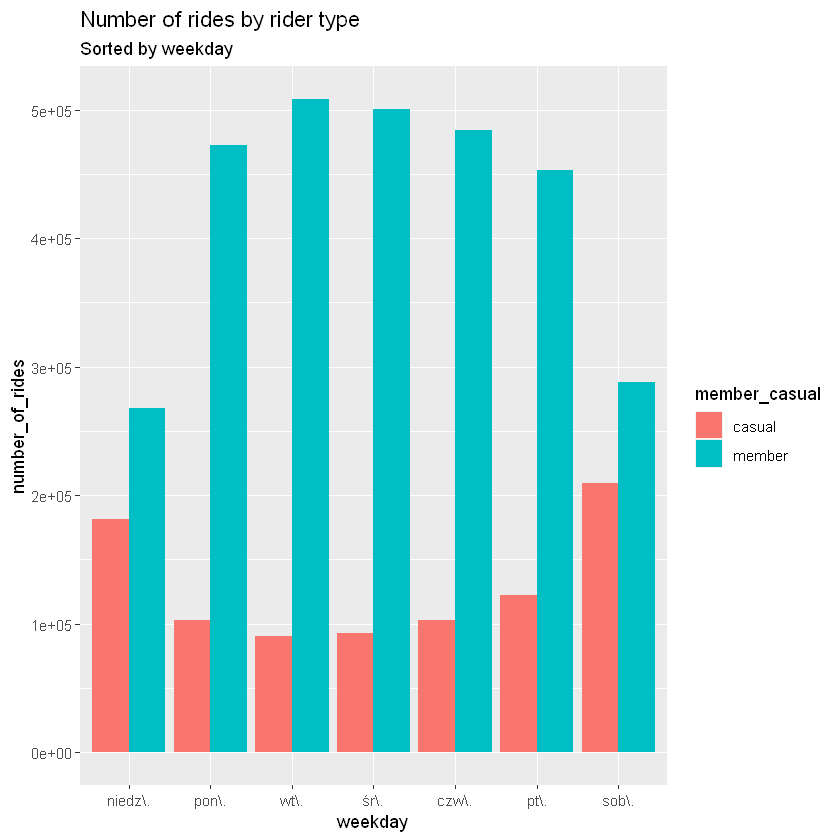

In [41]:
all_trips_v2 %>% 
  mutate(weekday = wday(started_at, label = TRUE)) %>% 
  group_by(member_casual, weekday) %>% 
  summarise(number_of_rides = n()
            ,average_duration = mean(ride_length)) %>% 
  arrange(member_casual, weekday)  %>% 
  ggplot(aes(x = weekday, y = number_of_rides, fill = member_casual)) +
  geom_col(position = "dodge") +
  labs(
      title = "Number of rides by rider type",
      subtitle = "Sorted by weekday"
      )

`summarise()` has grouped output by 'member_casual'. You can override using the `.groups` argument.



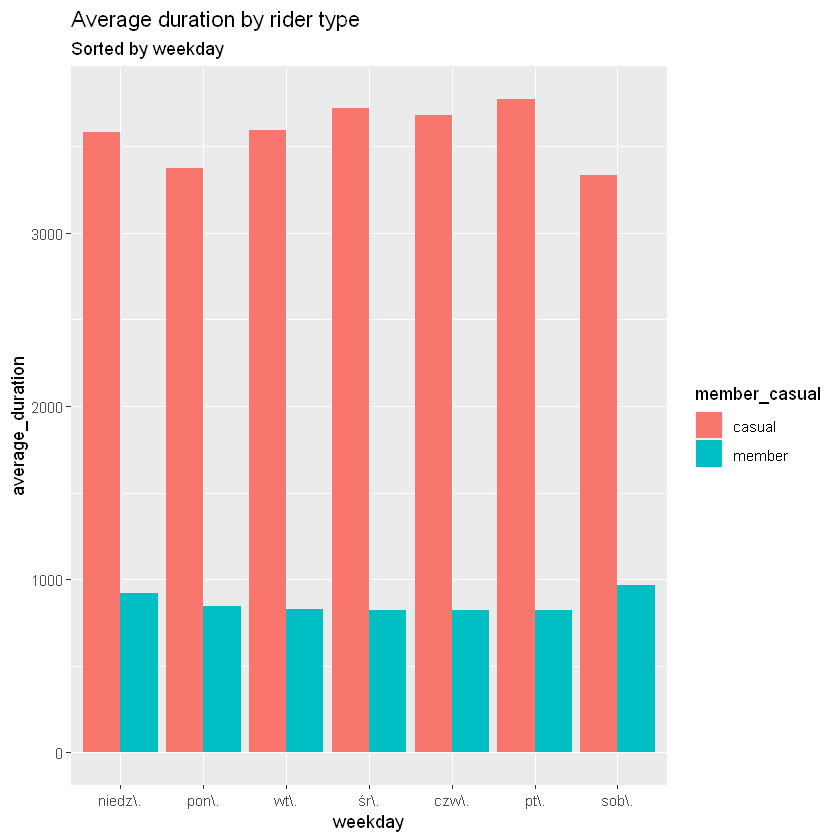

In [42]:
all_trips_v2 %>% 
  mutate(weekday = wday(started_at, label = TRUE)) %>% 
  group_by(member_casual, weekday) %>% 
  summarise(number_of_rides = n()
            ,average_duration = mean(ride_length)) %>% 
  arrange(member_casual, weekday)  %>% 
  ggplot(aes(x = weekday, y = average_duration, fill = member_casual)) +
  geom_col(position = "dodge") +
  labs(title = "Average duration by rider type",
       subtitle = "Sorted by weekday")

`summarise()` has grouped output by 'member_casual'. You can override using the `.groups` argument.



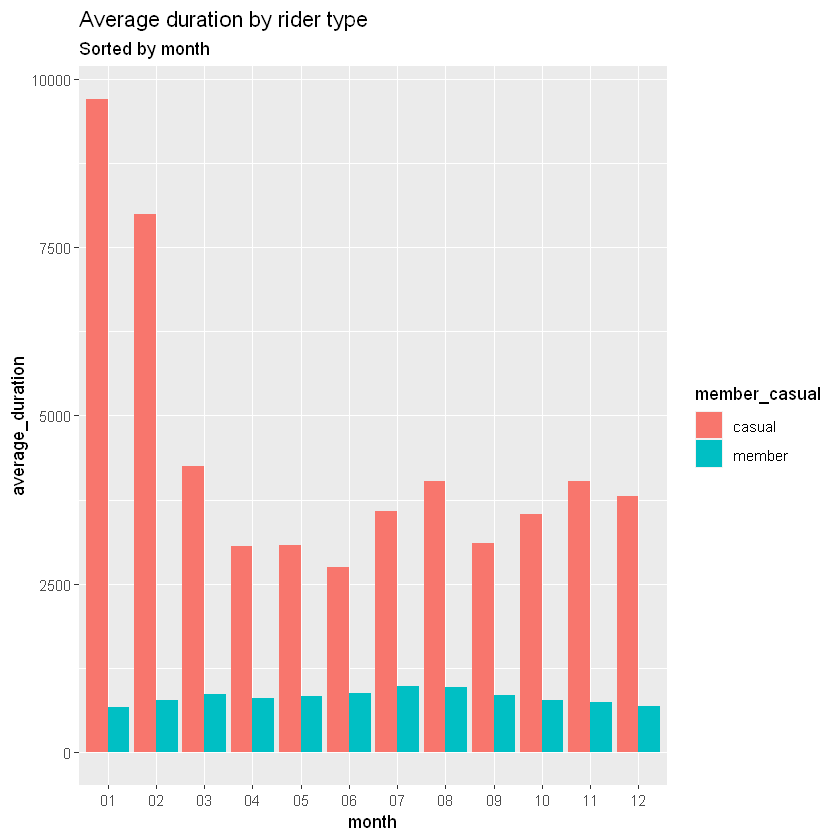

In [43]:
all_trips_v2 %>% 
  mutate(weekday = wday(started_at, label = TRUE)) %>% 
  group_by(member_casual, month) %>% 
  summarise(number_of_rides = n()
            ,average_duration = mean(ride_length)) %>% 
  arrange(member_casual, month)  %>% 
  ggplot(aes(x = month, y = average_duration, fill = member_casual)) +
  geom_col(position = "dodge") + 
  labs(title = "Average duration by rider type", 
       subtitle = "Sorted by month")